In [254]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import re
import glob
from pathlib import Path

from tool import get_data, mc_plot_m

## 3.2外部磁場に対する磁化応答

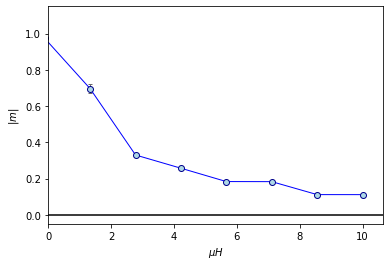

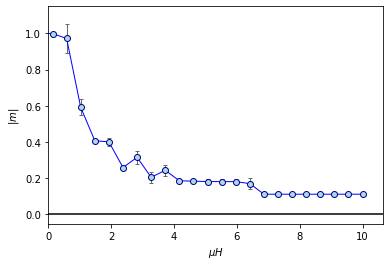

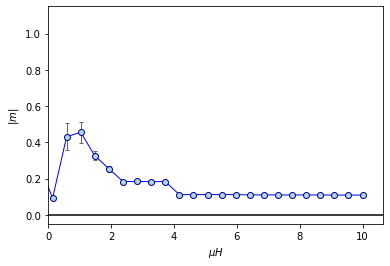

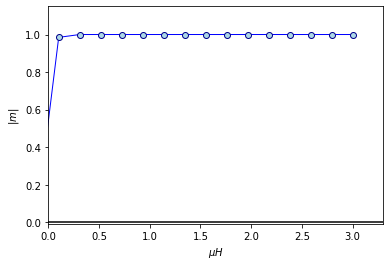

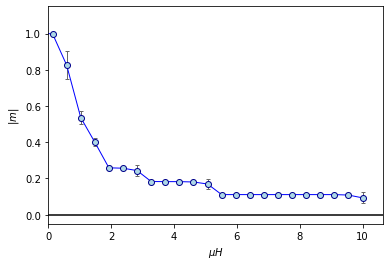

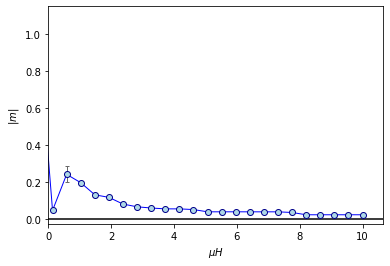

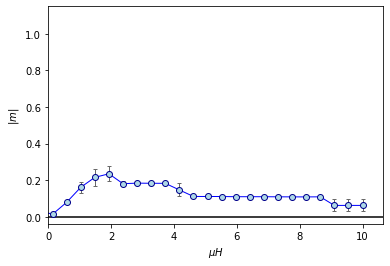

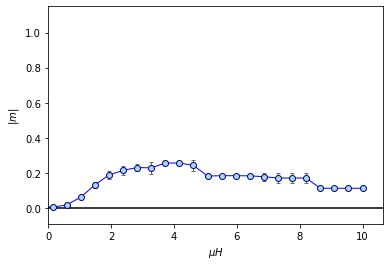

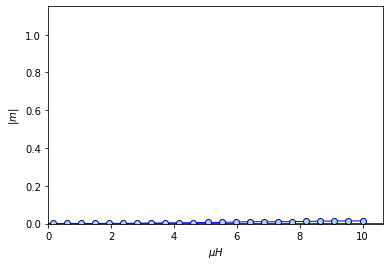

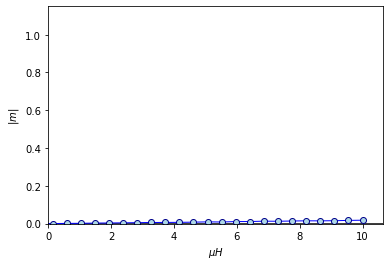

In [255]:
dir = Path("/home/yakkuru/computer_physics/report/submit/report3/code/data/magnetism")
files = glob.glob(str(dir / "*.dat"))
for f in files:
    save_file = f.replace(".dat", "_ex.pdf")
    mc_plot_m(f, save_file)

## 最終結果　アニメーション

In [211]:
dir_path = Path("/home/yakkuru/computer_physics/report/submit/report3/code/data/magnetism2")
cond_files = str(dir_path / "*" / "*.dat")
datas = get_data(cond_files)
T_data, J_data = datas['T_data'], datas['J_data']

In [244]:
import pathlib as pth
from pathlib import Path

import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

def make_animation(x, t, u_tx, ymin, ymax, filename) -> None:
    fig, ax = plt.subplots()

    # common setting for plot
    ax.set_xlabel("$x$")
    ax.set_ylabel("$u(x)$")
    ax.set_ylim((ymin, ymax))

    artists = []  # list of plot
    for i in range(t.shape[0]):
        # Make i-th plot
        # ax.set_title("t = %f" % t[i])
        artist = ax.plot(x, u_tx[i, :], 'o--', c='b')
        artist += [ax.text(0.05, 1.05, "T = %.2f" % t[i], transform=ax.transAxes)]
        artists.append(artist)

    # Make animation
    anim = animation.ArtistAnimation(fig, artists, interval=100, repeat=False)
    # plt.show()

    # Save animation
    anim.save(filename, writer="pillow")  # writer="pillow" or "imagemagick" for GIF
    plt.close()
    print("saved as '{}'".format(filename))

In [20]:
def load_file(file_dat):
    data = np.loadtxt(file_dat)  # テキストファイルからデータを読み込み

    # スライスを使って、2次元配列から1次元配列を抜き出す
    h = data[:, 0]  # field
    m_mean = np.absolute(data[:, 1])  # 磁化の平均値
    m_std = data[:, 2]  # 統計誤差
    return m_mean, m_std, h


In [245]:
m = np.empty(shape=(41, 30))
h = np.zeros(shape=(41, 30))
t = np.empty(shape=(41, ))
js = np.linspace(1, -1, 21)
ts = np.linspace(0.0001, 10, 41)

for key_j in js:
    j = J_data.loc[key_j, ]
    T = j.index

    item = list(j.items())[0][1]

    for i, (_t, path) in enumerate(item.items()):
        m[i], _, h = load_file(path)
        t[i] = _t

    save_file = f"./data/gif/change_J/change_J{round(key_j, 2)}.gif"
    make_animation(h, t, m, -0.09, 1.08, save_file)


saved as './data/gif/change_J/change_J1.0.gif'
saved as './data/gif/change_J/change_J0.9.gif'
saved as './data/gif/change_J/change_J0.8.gif'
saved as './data/gif/change_J/change_J0.7.gif'
saved as './data/gif/change_J/change_J0.6.gif'
saved as './data/gif/change_J/change_J0.5.gif'
saved as './data/gif/change_J/change_J0.4.gif'
saved as './data/gif/change_J/change_J0.3.gif'
saved as './data/gif/change_J/change_J0.2.gif'
saved as './data/gif/change_J/change_J0.1.gif'
saved as './data/gif/change_J/change_J0.0.gif'
saved as './data/gif/change_J/change_J-0.1.gif'
saved as './data/gif/change_J/change_J-0.2.gif'
saved as './data/gif/change_J/change_J-0.3.gif'
saved as './data/gif/change_J/change_J-0.4.gif'
saved as './data/gif/change_J/change_J-0.5.gif'
saved as './data/gif/change_J/change_J-0.6.gif'
saved as './data/gif/change_J/change_J-0.7.gif'
saved as './data/gif/change_J/change_J-0.8.gif'
saved as './data/gif/change_J/change_J-0.9.gif'
saved as './data/gif/change_J/change_J-1.0.gif'


In [247]:
m = np.empty(shape=(41, 30))
h = np.zeros(shape=(41, 30))
j = np.empty(shape=(30, ))
js = np.linspace(1, -1, 21)
ts = np.linspace(0.0001, 10, 41)

for key_t in ts:
    t = T_data.loc[key_t, ]
    J = t.index

    item = list(t.items())[0][1]

    for i, (_j, path) in enumerate(item.items()):
        m[i], _, h = load_file(path)
        j[i] = _j

    save_file = f"./data/gif/change_T/change_T{round(key_t, 3)}.gif"
    make_animation(h, j, m, -0.09, 1.08, save_file)

saved as './data/gif/change_T/change_T0.0.gif'
saved as './data/gif/change_T/change_T0.25.gif'
saved as './data/gif/change_T/change_T0.5.gif'
saved as './data/gif/change_T/change_T0.75.gif'
saved as './data/gif/change_T/change_T1.0.gif'
saved as './data/gif/change_T/change_T1.25.gif'
saved as './data/gif/change_T/change_T1.5.gif'
saved as './data/gif/change_T/change_T1.75.gif'
saved as './data/gif/change_T/change_T2.0.gif'
saved as './data/gif/change_T/change_T2.25.gif'
saved as './data/gif/change_T/change_T2.5.gif'
saved as './data/gif/change_T/change_T2.75.gif'
saved as './data/gif/change_T/change_T3.0.gif'
saved as './data/gif/change_T/change_T3.25.gif'
saved as './data/gif/change_T/change_T3.5.gif'
saved as './data/gif/change_T/change_T3.75.gif'
saved as './data/gif/change_T/change_T4.0.gif'
saved as './data/gif/change_T/change_T4.25.gif'
saved as './data/gif/change_T/change_T4.5.gif'
saved as './data/gif/change_T/change_T4.75.gif'
saved as './data/gif/change_T/change_T5.0.gif'
sav